In [31]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets


In [5]:
X, Y = load_planar_dataset()

In [28]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "gaussian_quantiles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2



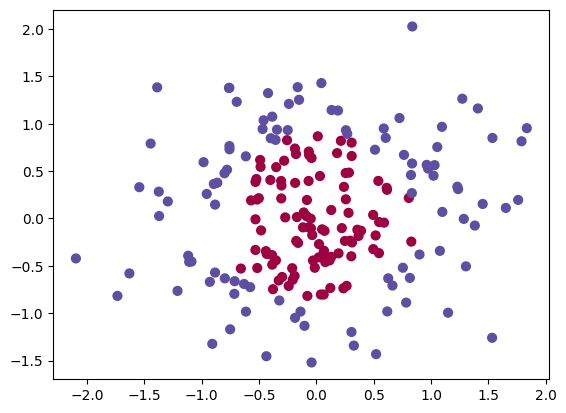

In [29]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

In [8]:

def layer_sizes(X, Y):

    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h =4

    return (n_x, n_h, n_y)

In [9]:

def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [10]:

def forward_propagation(X, parameters):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    

    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [11]:

def compute_cost(A2, Y):

    
    m = Y.shape[1] # number of examples

    cost = np.dot(Y, np.log(A2).T) + np.dot((1-Y), np.log((1-A2)).T)
    cost/=-m

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    
    return cost

In [12]:

def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2 -Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis = 1,keepdims = True)/m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis = 1,keepdims = True)/m
 
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [13]:

def update_parameters(parameters, grads, learning_rate = 1.2):

    W1 = copy.deepcopy(parameters["W1"])
    b1 = copy.deepcopy(parameters["b1"])
    W2 = copy.deepcopy(parameters["W2"])
    b2 = copy.deepcopy(parameters["b2"])

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 -= learning_rate*dW1
    b1 -= learning_rate*db1
    W2 -= learning_rate*dW2
    b2 -= learning_rate*db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [14]:

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):

    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(0, num_iterations):

        A2, cache = forward_propagation(X, parameters)

        cost = compute_cost(A2,Y)

        grads = backward_propagation(parameters, cache, X, Y)
 
        parameters = update_parameters(parameters, grads)

        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [15]:

def predict(parameters, X):

    A2 , cache = forward_propagation(X,parameters)
    predictions = (A2>=0.5)

    return predictions

Cost after iteration 0: 0.693117
Cost after iteration 1000: 0.067613
Cost after iteration 2000: 0.033941
Cost after iteration 3000: 0.022204
Cost after iteration 4000: 0.017686
Cost after iteration 5000: 0.014412


C:\Users\Asjad1\AppData\Local\Temp\ipykernel_13124\487648570.py:6: RuntimeWarning: divide by zero encountered in log
  cost = np.dot(Y, np.log(A2).T) + np.dot((1-Y), np.log((1-A2)).T)


Cost after iteration 6000: nan
Cost after iteration 7000: nan
Cost after iteration 8000: nan
Cost after iteration 9000: nan

Accuracy:  100.0


C:\Users\Asjad1\AppData\Local\Temp\ipykernel_13124\2972988716.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)


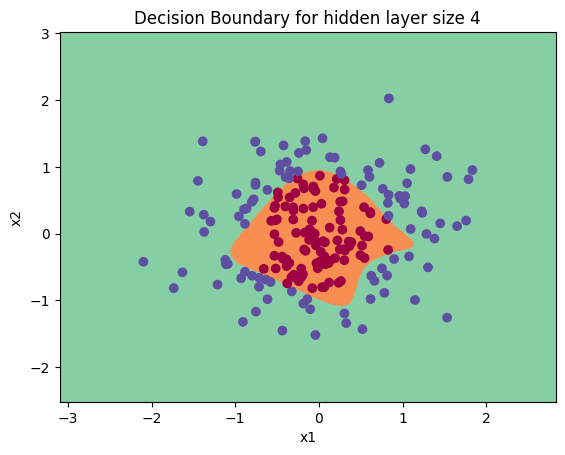

In [30]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 16, num_iterations = 10000, print_cost=True)
predictions = predict(parameters, X)
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))
accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)
print("\nAccuracy: ", accuracy)